Given the unnormalized density: $p(x)=\exp(-x^2/2)(\sin(x)^2+3\cos(x)^2*\sin(7x)^2+1)$ for $x\in[-3,3]$ , the task is to sample from this distribution and calculate $E(x^2)$.

Try rejection sampling with a uniform proposal


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

239
The estimate for E(x^2) is: 0.8922519759272642


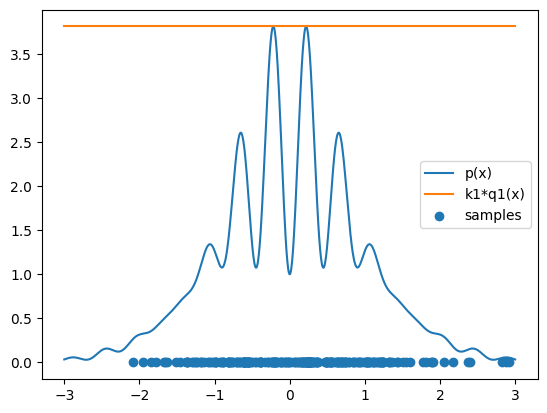

In [ ]:
def p(x):
    return np.exp(-x**2/2)*(np.sin(x)**2+3*np.cos(x)**2*np.sin(7*x)**2+1)

def q1(x):
    return np.ones_like(x)

x = np.linspace(-3,3,1000)
k1= np.max(p(x))

fig, ax = plt.subplots()
ax.plot(x,p(x),label='p(x)')
ax.plot(x,k1*q1(x),label='k1*q1(x)')


def rejection_uniform(k1, n=1000):
    #rejection sampling to get points from p(x)
    samples=[]
    for i in range(n):
        z = np.random.uniform(-3,3)
        u = np.random.uniform(0,1)
        if u*k1*q1(z) < p(z):
            samples.append(z)
    
    return samples

def est_2moment(samples):
    return np.mean(np.array(samples)**2)

samples = rejection_uniform(k1)

print(len(samples))
ax.scatter(samples,np.zeros_like(samples),label='samples')
ax.legend()

#estimate E(x^2) using the samples
print('The estimate for E(x^2) is:',est_2moment(samples))



Try rejection sampling with a normal distribution

565
The estimate for E(x^2) is: 0.8262194670392186


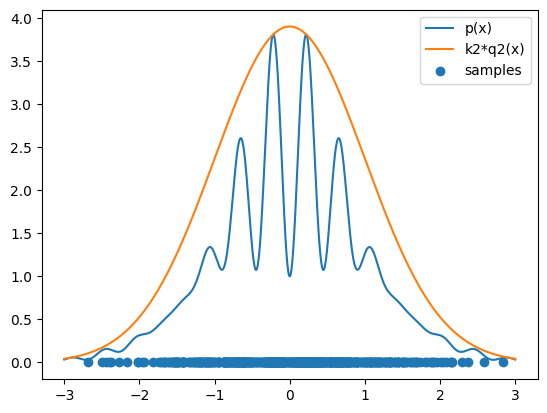

In [85]:
def q2(x):
    return norm.pdf(x,0,1)

#find the maximum of q2(x) 
arg_max_p = np.argmax(p(x))
max_norm = q2(x[arg_max_p])
# we want max_norm*q2(x)=k1
k2= k1 / max_norm

fig2, ax2 = plt.subplots()
ax2.plot(x,p(x),label='p(x)')
ax2.plot(x,k2*q2(x),label='k2*q2(x)')

def rejection_normal(k2, n=1000):
    #rejection sampling to get points from p(x)
    samples=[]
    for i in range(n):
        z2 = np.random.normal(0,1)
        if z2 < 3 and z2 > -3:
            u = np.random.uniform(0,1)
            if u*k2*q2(z2) < p(z2):
                samples.append(z2)
    
    return samples

samples = rejection_normal(k2)
print(len(samples))

ax2.scatter(samples,np.zeros_like(samples),label='samples')
ax2.legend()

#estimate E(x^2) using the samples
print('The estimate for E(x^2) is:',est_2moment(samples))

Try self-normalized importance sampling with a gaussian proposal

In [ ]:
#self-normalized importance sampling with gaussian

#gives already estimate for E(x^2)
def importance_normal(n=1000):
    z3 = np.random.normal(0,1,n)
    weights = (p(z3)/q2(z3))/(np.sum(p(z3)/q2(z3)))
    return np.sum(weights*(np.array(z3)**2))

print('The estimate for E(x^2) is:',importance_normal())

The estimate for E(x^2) is: 0.948184447110879


Repeat the previous sampling methods for sample sizes: {10, 100, 1000}. For each method and each sample size, calculate the mean and standard deviation of the estimator , e.g. by repeating each simulation an appropriate number of times. Plot the values. Which method appears to perform better?

In [114]:
rounds=500

est_rejection_unif=[]
est_rejection_norm=[]
est_importance=[]

for n in [10,100,1000]:
    ru=[]
    rn=[]
    im=[]

    for i in range(rounds):
        samples = rejection_uniform(k1,n)
        ru.append(est_2moment(samples))
        
        samples = rejection_normal(k2,n)
        rn.append(est_2moment(samples))
        
        im.append(importance_normal(n))
        
    est_rejection_unif.append([np.nanmean(ru),np.nanstd(ru)])
    est_rejection_norm.append([np.nanmean(rn), np.nanstd(rn)])   
    est_importance.append([np.nanmean(im), np.nanstd(im)])

/Users/blm117/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/blm117/Library/Python/3.9/lib/python/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


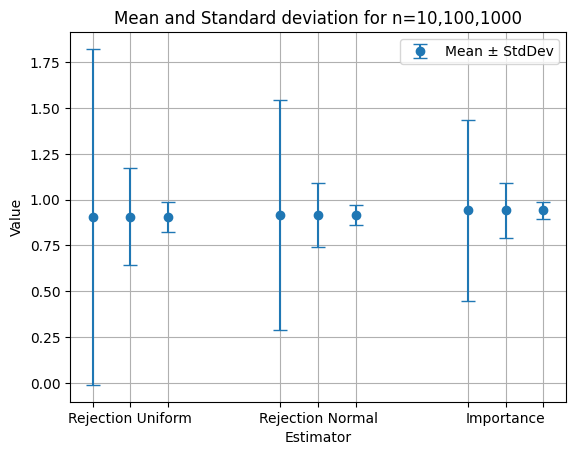

In [120]:
# Store lists in a single array for easier processing
data = [est_rejection_unif, est_rejection_norm, est_importance]

# Calculate means and standard deviations
means = [data[i][i][0] for i in range(len(data)) for j in range(len(data[i]))]
std_devs = [data[i][j][1] for i in range(len(data)) for j in range(len(data[i]))]

# Plotting
x_positions = [1.2,1.4,1.6, 2.2,2.4,2.6, 3.2,3.4,3.6]  # X-axis positions for each list
plt.errorbar(x_positions, means, yerr=std_devs, fmt='o', capsize=5, label='Mean ± StdDev')

# Add labels, title, and legend
plt.xticks(x_positions, ['','Rejection Uniform', '', 
                         '','Rejection Normal','',
                         '','Importance',''])  # Label each list
plt.xlabel('Estimator')
plt.ylabel('Value')
plt.title('Mean and Standard deviation for n=10,100,1000')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()